# Säljrapport



## Introduktion

Den här rapporten analyserar en fiktiv e-handelsplattform och ger ett snabbt beslutsunderlag inför nästa kampanjperiod.

I rapporten besvaras följande frågor:
1. Vad säljer? – vilka kategorier driver mest intäkt?
2. Var säljer vi? – vilka städer står för störst intäkt?
3. När säljer vi? – finns tidsmönster/säsong i försäljningen?
4. Hur ser en typisk order ut? – AOV (Average Order Value) 
5. Hur ser en typisk order ut? - Totalt sålda enheter och typisk orderstorlek.

**Importeringar för hela Notebooken** (rör ej)

In [ ]:
import matplotlib.pyplot as plt 
from src.io_utils import * 
from src.metrics import * 
from src.viz import * 


**Förbereder data**

In [ ]:
# Read
df = read_data("data/ecommerce_sales.csv")
 
# Clean
df_clean = clean_data(df)
 
#Visualize
print(df_clean.sample(3))
 
#specify date format
df_clean["month"] = df_clean.date.dt.month_name()
month_order = ["January", "February", "March", "April", "May", "June"]
df_clean["month"] = pd.Categorical(df_clean["month"], categories=month_order, ordered=True)

def total_sum_and_total_units_sold(df: pd.DataFrame):
    df_new = {}
    df_new["Total revenue"] = (df["revenue"].sum())
    df_new["Total units sold"] = (df["units"].sum())
 
    return pd.Series(df_new)
print(total_sum_and_total_units_sold(df_clean))

      order_id       date       city     category   price  units  revenue
2167    102167 2024-06-25      Malmö       Beauty  443.82      2   887.64
136     100136 2024-05-21  Stockholm         Home  245.59      2   491.18
119     100119 2024-06-26  Stockholm  Electronics  956.61      4  3826.44
Total revenue       3502767.23
Total units sold       7463.00
dtype: float64


## Nyckeltal



### 1. Vad säljer? – vilka kategorier driver mest intäkt?


Intäkt per kategori & Topp 3 kategorier efter intäkt

**Sammanfattning:**
- Totala intäkterna visar sig vara ~3 502 767, medan totala antal enheter sålda är 7463.
- Av de 6 kategorier som säljs så drar Electronics in mest i intäkter enligt graferna nedan.
- Top 3 kategorier visar sig vara Electronics (1 364 228) följ av Sports category (734 653) och Clothing(586 744)
- När vi ser till den generella orderns intäkter så ser vi att Electronics drar in mest som medelintäkt per köp, men har även ett gäng outliers.
- Skulle det kunna vara så att våra outliers drar upp inkomsten som Electronics genererar? Om vi kollar antal outliers per kategori så är de relativt detsamma.
  Även när vi räknar bort intäkterna som outliers i Electronics står för (96 366) så vinner ändå Electronics (1 267 862) intäkter överlägset.


In [ ]:
print(total_sum_and_total_units_sold(df_clean))
plot_revenue_per_category(df_clean)
boxplot_revenue_per_category(df_clean)
looking_for_them_outliers_in_category_revenue(df_clean)

### 2. Var säljer vi? – vilka städer står för störst intäkt?

Intäkt per stad och top 3 städer enligt intäkt

**Sammanfattning:** 

Analysen visar städer per intäkter.
- Stockholm toppar listan med en total intäkt på cirka 1,23 miljoner kronor.
- Göteborg kommer på andra plats med ungefär 860 000 kronor i intäkter.
- Malmö är tredje störst med cirka 568 000 kronor i intäkter.

Denna information hjälper till att identifiera viktiga regioner som bidrar mest till försäljningen och kan användas för att rikta marknadsföring samt resurser mer effektivt.

In [ ]:
df_rev_city = revenue_per_city(df_clean)
print(f"The top 3 cities per revenue are:\n"
      f"{df_rev_city.head(3)}.")

fig, ax = plt.subplots(figsize=(7,5))
bar(ax, df_rev_city["city"], df_rev_city["tot_rev_city"], "Revenue per City", "City", "Revenue", color="#4682B4")
plt.show()

### 3. När säljer vi? – finns tidsmönster/säsong i försäljningen?

Intäkt per månad

**Sammanfattning:**
- Året börjar positivt med en hög intäkt i Januari på 664 083,32 för att sedan jämnas ut mer under året då vi ligger i genomsnitt omkring 580 000.
- Vi ser senare en dipp i mars med den lägsta intäkten på 487 602 på hela året men återupptar genomsnitts intäkten därefter.
- Den totala intäkten över denna period är 3 502 767. 

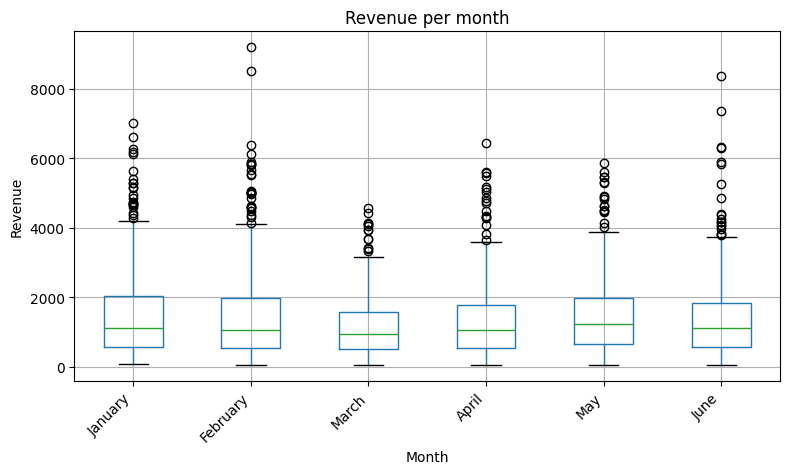

c:\Users\Mauro\Desktop\Gruppuppgift -Linnéa branch\Gruppuppgift\src\viz.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly = monthly_revenue.groupby("month", sort= False)["revenue"].sum().reset_index()


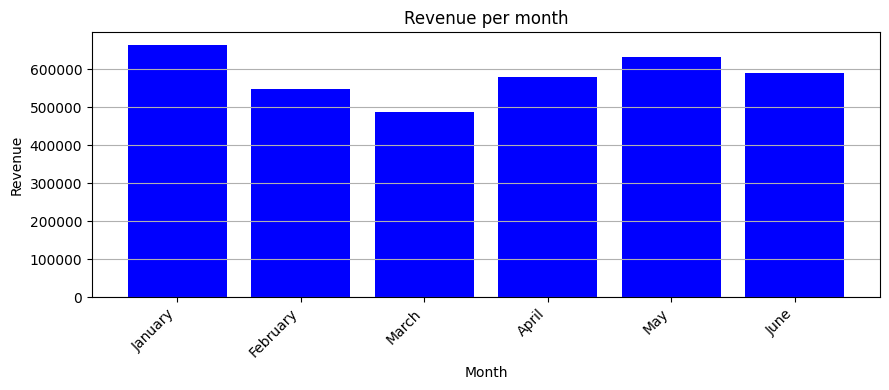

In [ ]:
df_sorted = df_clean.sort_values('month')

revenue_monthly_boxplot(df_clean)
revenue_monthly_bar(df_sorted)



### 4. Hur ser en typisk order ut? – AOV (Average Order Value)

AOV per månad & AOV per kategori

**Sammanfattning:**

Analysen visar genomsnittlig ordervärdet per månad och kategori och har beräknats *Totala intäkter / Antal beställningar*.

- Den genomsnittliga ordervärdet i första halvan av 2024 är **1401 kr** och hålls relativt stabilt undera hela perioden, med undantag för en dipp i mars.
- Kategorierna *Electronics* och *Sports* driver upp ordervärdena, medan övriga kategorier ligger under genomsnittet, med *Toys* och *Beauty* som lägst.

In [ ]:
monthly_aov, total_aov, category_aov = calculate_aov(df_clean)
plot_aov_figure(monthly_aov, total_aov, category_aov)

### 5. Hur ser en typisk order ut? - Totalt sålda enheter & typisk orderstorlek (enheter)

Totalt sålda enheter &  Spridning av sålda enheter per kategori 

**Sammanfattning:**

Analysen visar totalt sålda enheter per kategori samt visar typsik orderstorlek per kategori.

- ....
- Den genomsnittliga orderstorleken är 3 produkter per order och majoriteten av kunder köper mellan 2-4 produkter per order.
- *Home* har genomsnittligt den minsta orderstoleken på 2,5 produkter, men är också den kategorin som visar flest avvikande siffror. 
- Inom *Clothing*, *Sports* och *Toys* finns det också kunder som sticker ut och köper 8 till 9 produkter, men det är mer ovanligt.

In [ ]:
# Distribution of units sold per categeory
ave_units_per_order, df = calculate_distribution_units_sold(df_clean)
box_plot_units_per_category(ave_units_per_order, df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/ecommerce_sales.csv")


def compute_total_units(df):
    return df["units"].sum()


def plot_units_by_category(df):
    units_by_category = df.groupby("category")["units"].sum().sort_values(ascending=False)
    units_by_category.plot(kind="bar", title="Sålda enheter per kategori", figsize=(8,4))
    plt.xlabel("Kategori")
    plt.ylabel("Antal enheter")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


total_units = compute_total_units(df)
print("Totalt antal sålda enheter:", total_units)

plot_units_by_category(df)


### 6. Eventuella avvikelser – något oväntat mönster som sticker ut?



**Produktkategorier:** 
- Kategorin Electronics dominerar försäljningen både totalt och månadsvis, med en markant marginal jämfört med övriga kategorier. Beauty och Toys ligger längst ner i försäljningsstatistiken, med en skillnad på nästan 1 200 000 kronor jämfört med Electronics.
Samtliga kategorier uppvisar outliers, vilket väcker frågan om dessa avvikande datapunkter kan ha en betydande påverkan på den höga intäkten inom Electronics.

**Geografisk försäljning:**
- Stockholm, som Sveriges mest tätbefolkade stad, toppar försäljningssiffrorna, följt av Göteborg och Malmö. Intäkterna per stad korrelerar väl med befolkningsstatistiken. Noterbart är att Göteborg genererar relativt höga intäkter trots att stadens befolkning endast utgör cirka 60 % av Stockholms.

**Månadsvariationer:**
- Den största avvikelsen ses i februari, som visar högst försäljning – troligen till följd av januari-reor. Trots ett genomsnitt på cirka 580 000 kronor per månad, sjunker intäkterna markant i mars, med en nedgång på cirka 100 000 kronor jämfört med snittet.
Denna nedgång återspeglas även i mars månads ordervärde. En typisk order innehåller cirka tre produkter, men kategorin Home har den lägsta genomsnittliga orderstorleken på 2,5 produkter, vilket också visar störst avvikelse.

## Rekommendationer



**Fokus på Electronics i Stockholm under januari:**
- För att maximera intäkterna bör resurser prioriteras till Electronics-kategorin i Stockholm, särskilt under januari. Säkerställ tillräcklig bemanning och lagerkapacitet för att möta efterfrågan.
  
**Åtgärder för marsförsäljningen:**
- Den låga försäljningen i mars kräver vidare analys. Vi rekommenderar en djupgående utredning samt riktad marknadsföring baserad på målgruppsdata för att identifiera och åtgärda orsakerna till nedgången.
